In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
# Reading the dataset
df= pd.read_csv("retail_price.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [ ]:
#print first 5 rows
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [ ]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [ ]:
df.shape

(676, 30)

In [ ]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [ ]:
df['unit_price'].unique()

array([ 45.95      ,  40.53181818,  39.99      ,  39.24      ,
        69.9       ,  82.63333333,  97.58823529,  89.        ,
        97.33333333,  99.        ,  99.5       , 101.        ,
        19.9       ,  21.54285714,  24.5       ,  32.5       ,
        35.05714286,  36.2       ,  59.9       ,  51.32222222,
        56.97777778,  49.9       ,  51.4       ,  53.9       ,
        52.9       ,  19.99      ,  23.39740741,  23.99      ,
       134.99      , 146.99      , 157.3603704 , 166.99      ,
       176.99      , 173.8081818 , 169.99      , 110.99      ,
       116.5284615 , 119.99      , 122.99      ,  56.99      ,
        50.49      ,  49.99      ,  99.99      ,  97.952     ,
        84.6925    ,  89.99      ,  83.74      ,  79.99      ,
        82.82142857,  53.78571429,  55.75      ,  50.35714286,
        53.05789474, 167.        , 119.9       ,  93.09489362,
        77.155     ,  88.        ,  89.9       ,  78.9       ,
        53.64828125,  55.425     ,  50.9       ,  53.70

In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
qty,1.000000,0.749605,-0.135521,-0.103432,0.079973,-0.022749,0.128515,-0.034301,-0.004028,0.441547,...,-0.033570,-0.047883,-0.053477,-0.027044,0.036633,-0.069855,-0.068522,-0.074466,-0.086439,-0.085885
total_price,0.749605,1.000000,0.025848,0.409001,-0.002594,0.175376,0.157945,0.060092,0.036119,0.386389,...,0.144426,0.058941,-0.006729,0.203050,0.113178,-0.001240,0.121114,-0.240526,-0.077442,0.426256
freight_price,-0.135521,0.025848,1.000000,0.203659,0.013398,0.423219,-0.200990,0.670689,0.199468,0.088261,...,-0.013969,-0.053927,0.306479,-0.084208,0.168881,0.484647,-0.089285,0.054627,0.412115,0.201143
unit_price,-0.103432,0.409001,0.203659,1.000000,-0.170613,0.280176,0.076990,0.112958,0.042162,0.043391,...,0.317113,0.197425,-0.004518,0.466459,0.085436,0.026601,0.383780,-0.242111,0.019461,0.994453
product_name_lenght,0.079973,-0.002594,0.013398,-0.170613,1.000000,0.124510,0.131951,-0.044050,0.163520,0.082239,...,-0.344125,0.019053,-0.079388,-0.240613,-0.055069,0.016903,-0.382787,0.117217,-0.001470,-0.174862
product_description_lenght,-0.022749,0.175376,0.423219,0.280176,0.124510,1.000000,0.060124,0.386973,0.187544,0.067497,...,-0.004371,0.188601,0.031771,0.015030,0.162777,0.155763,0.043880,0.048146,0.186760,0.273883
product_photos_qty,0.128515,0.157945,-0.200990,0.076990,0.131951,0.060124,1.000000,-0.129291,0.048286,-0.022536,...,-0.045398,-0.005677,-0.194512,-0.133835,-0.042817,-0.158749,-0.000661,0.061731,-0.044935,0.075246
product_weight_g,-0.034301,0.060092,0.670689,0.112958,-0.044050,0.386973,-0.129291,1.000000,0.178678,0.053523,...,0.064330,-0.241861,0.138384,-0.017125,0.144289,0.320658,-0.035559,0.208836,0.351268,0.112790
product_score,-0.004028,0.036119,0.199468,0.042162,0.163520,0.187544,0.048286,0.178678,1.000000,0.020185,...,-0.215284,0.297746,-0.117613,-0.064352,0.506967,0.050800,-0.124399,0.353623,0.049791,0.035109
customers,0.441547,0.386389,0.088261,0.043391,0.082239,0.067497,-0.022536,0.053523,0.020185,1.000000,...,-0.177735,0.077314,-0.204012,-0.142704,0.148290,-0.156454,-0.115673,-0.220235,-0.172532,0.056988


<ipython-input-10-e35e98a8be34>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Blues")


<Axes: >

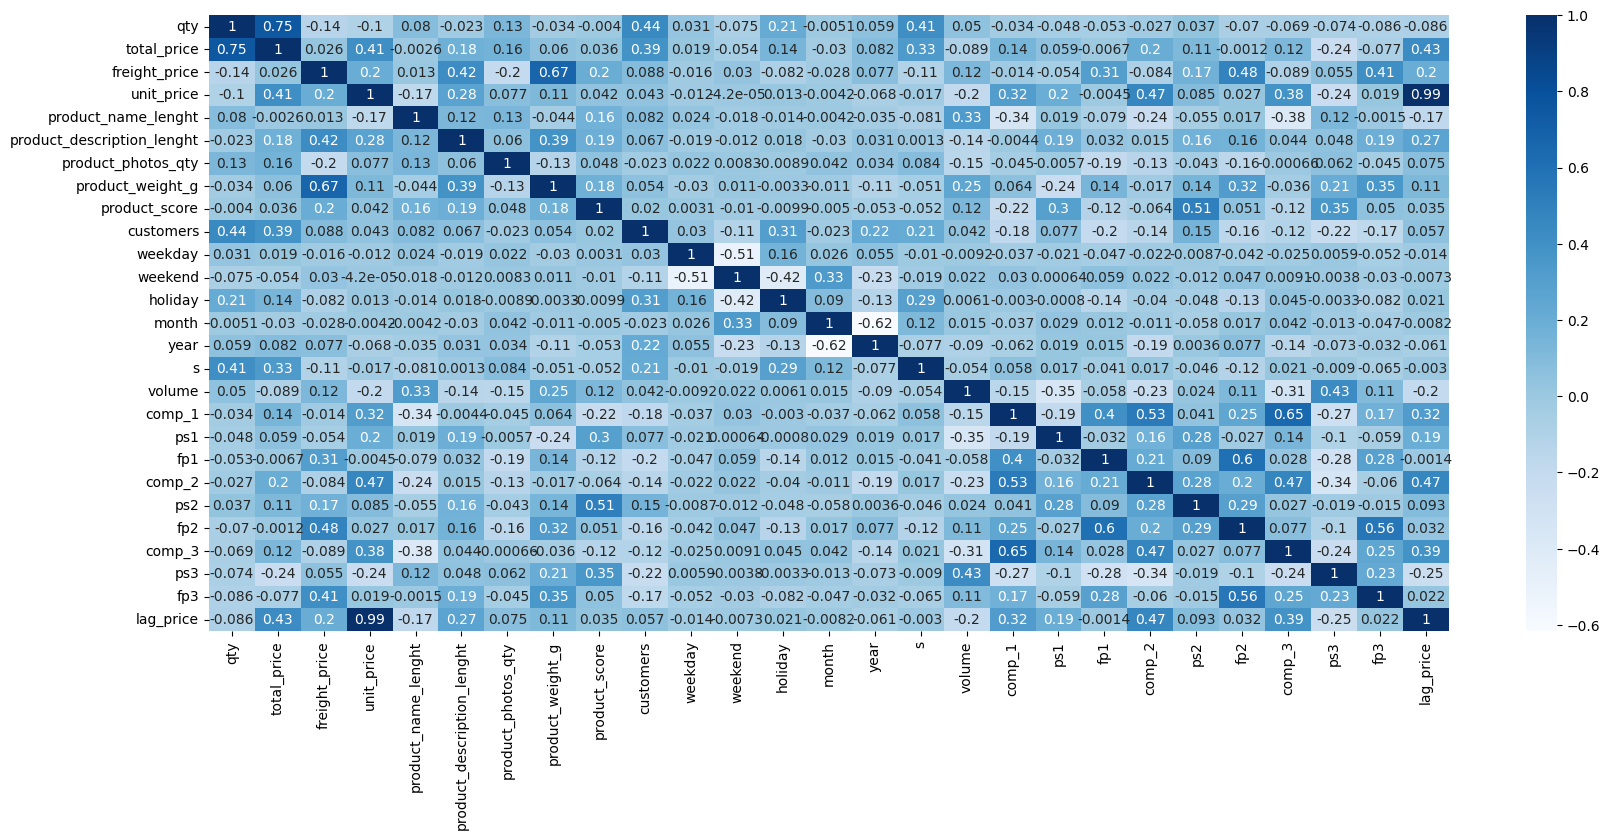

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

<Axes: xlabel='unit_price', ylabel='Count'>

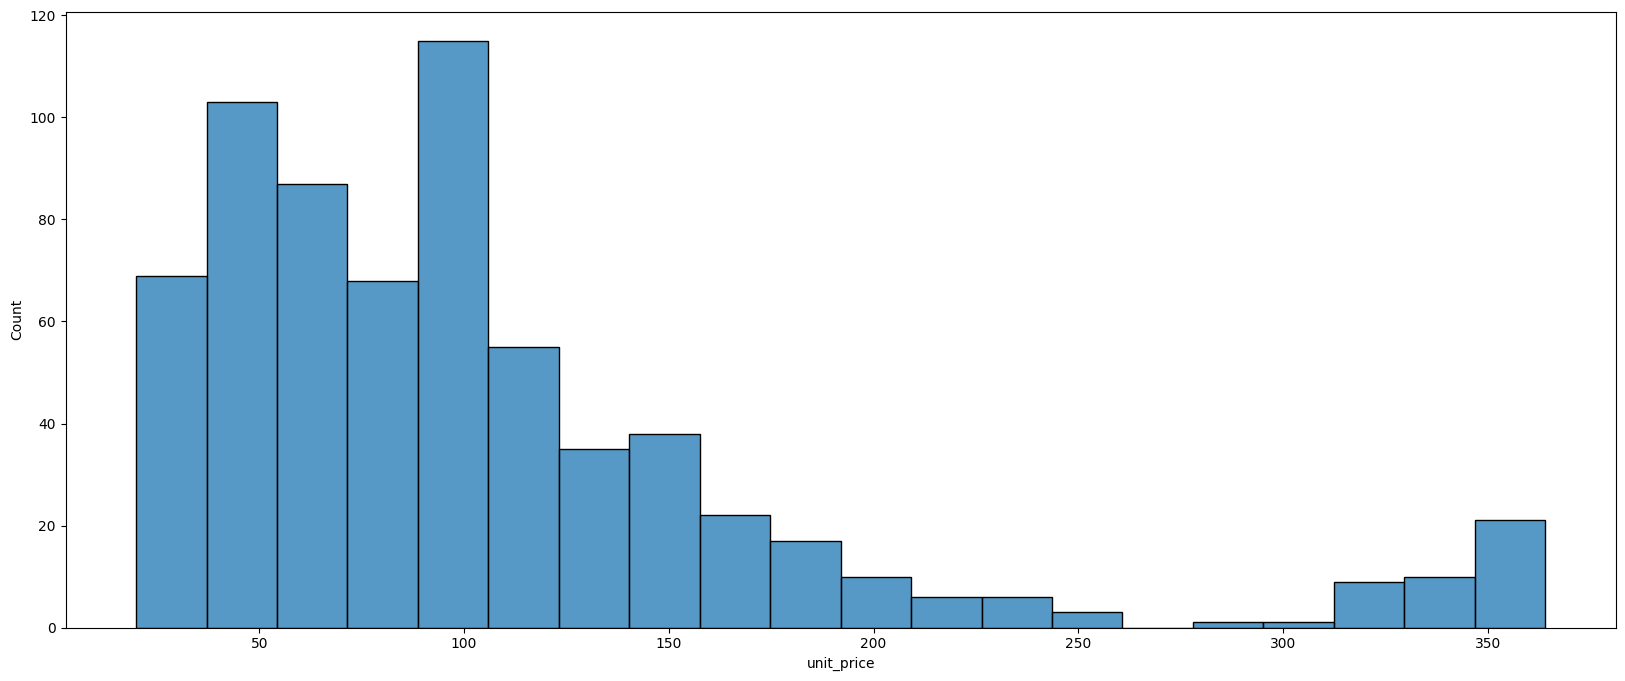

In [ ]:
fig, ax = plt.subplots(figsize =(20,8))
sns.histplot(df['unit_price'])

In [ ]:
df['total_price_log'] = np.log(df['total_price'])
df['unit_price_log'] = np.log(df['unit_price'])
df['qty_log'] = np.log(df['qty']+1)


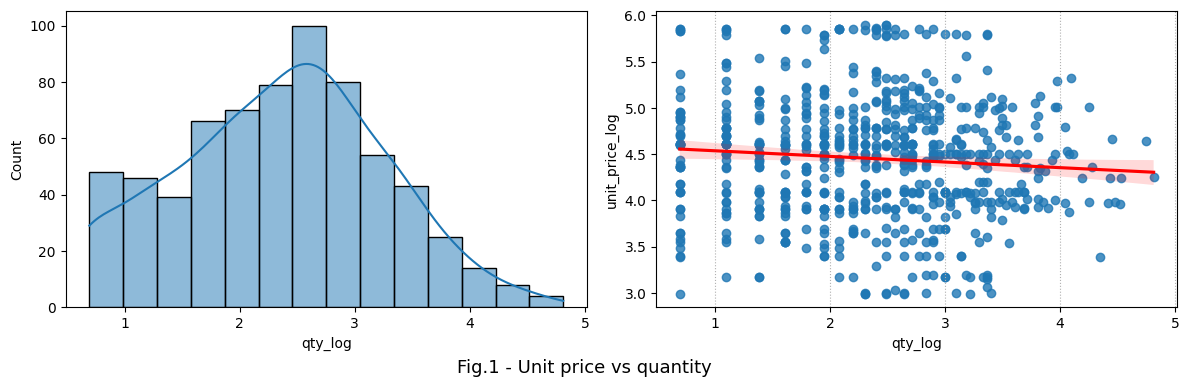

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

fig = sns.histplot(df['qty_log'], ax=ax[0], kde=True); #,bins=15
fig = sns.regplot(df, y='unit_price_log', ax=ax[1], x='qty_log', line_kws={"color": "red"}) #
ax[1].xaxis.grid(linestyle=':')


ax[0].set_title('Fig.1 - Unit price vs quantity ', y=-0.25, fontsize=13, x=1) #
plt.tight_layout()

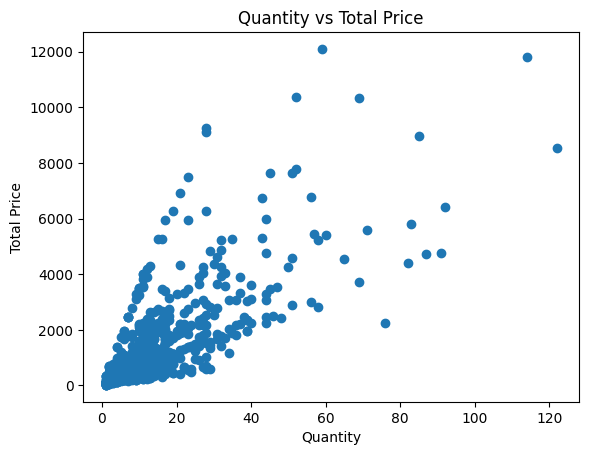

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['qty'], df['total_price'])

# Set labels and title
ax.set_xlabel('Quantity')
ax.set_ylabel('Total Price')
ax.set_title('Quantity vs Total Price')

# Show the plot
plt.show()

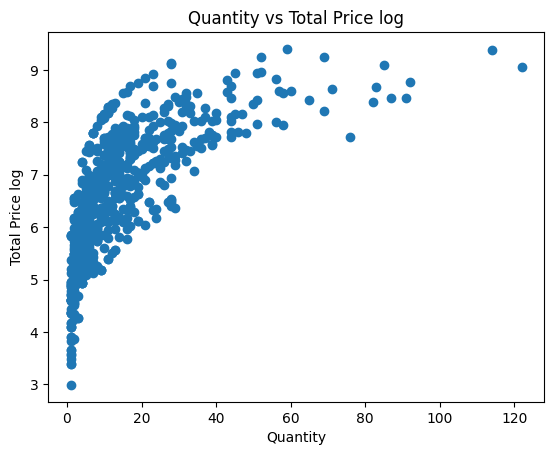

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['qty'], df['total_price_log'])

# Set labels and title
ax.set_xlabel('Quantity')
ax.set_ylabel('Total Price log')
ax.set_title('Quantity vs Total Price log')

# Show the plot
plt.show()

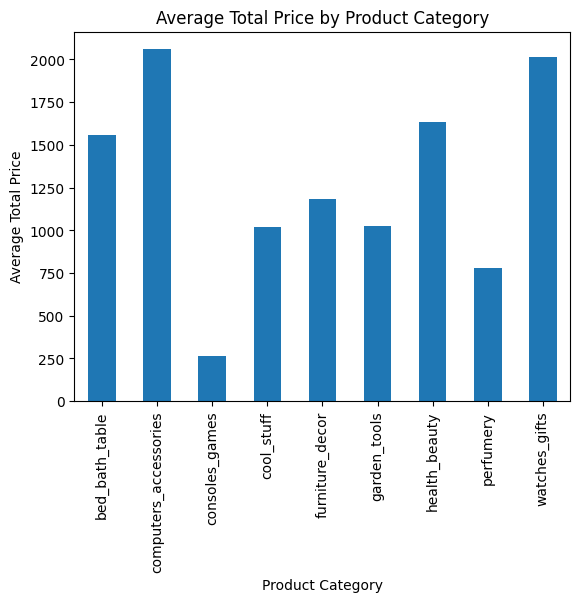

In [ ]:
average_prices = df.groupby('product_category_name')['total_price'].mean()

# Create a bar chart
fig, ax = plt.subplots()
average_prices.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Product Category')
ax.set_ylabel('Average Total Price')
ax.set_title('Average Total Price by Product Category')

# Show the plot
plt.show()

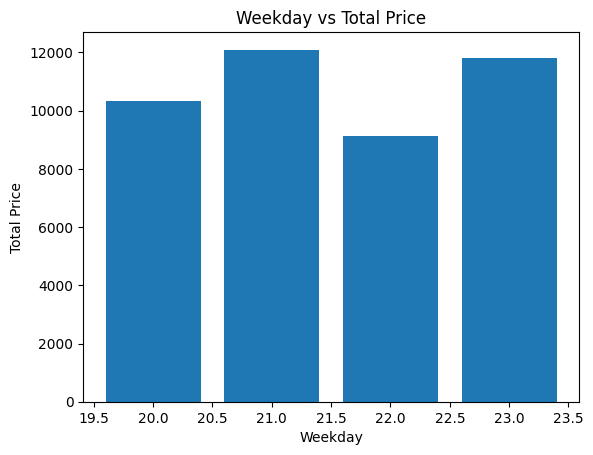

In [ ]:
fig,ax = plt.subplots()
ax.bar(df['weekday'],df['total_price'])
ax.set_xlabel('Weekday')
ax.set_ylabel('Total Price')
ax.set_title('Weekday vs Total Price')

# Show the plot
plt.show()


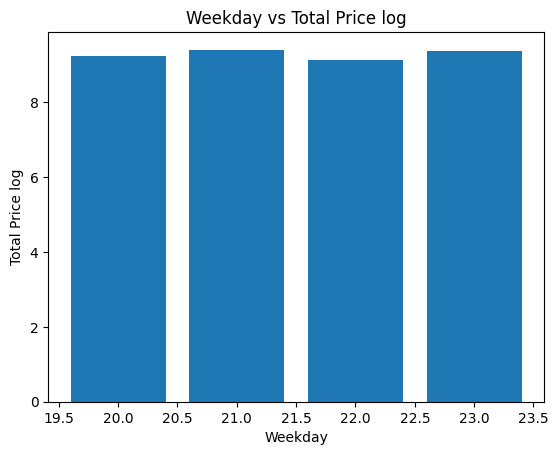

In [ ]:
fig,ax = plt.subplots()
ax.bar(df['weekday'],df['total_price_log'])
ax.set_xlabel('Weekday')
ax.set_ylabel('Total Price log')
ax.set_title('Weekday vs Total Price log')

# Show the plot
plt.show()

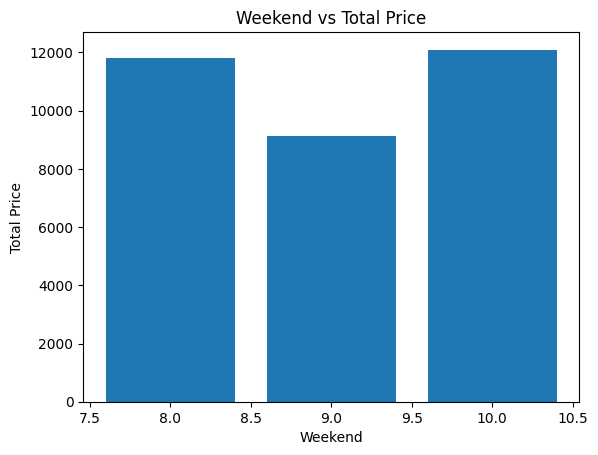

In [ ]:
fig,ax = plt.subplots()
ax.bar(df['weekend'],df['total_price'])
ax.set_xlabel('Weekend')
ax.set_ylabel('Total Price')
ax.set_title('Weekend vs Total Price')

# Show the plot
plt.show()


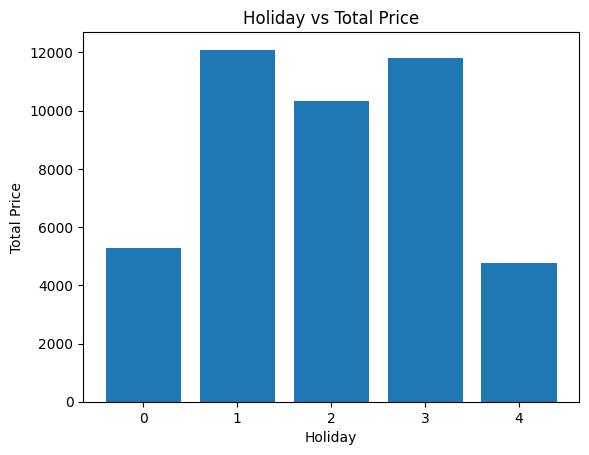

In [ ]:
fig,ax = plt.subplots()
ax.bar(df['holiday'],df['total_price'])
ax.set_xlabel('Holiday')
ax.set_ylabel('Total Price')
ax.set_title('Holiday vs Total Price')

# Show the plot
plt.show()


Feature Engineering


In [ ]:
df_copy = df.copy()
df_copy.drop(['product_id','month_year', 'year', 'qty', 'lag_price', 'unit_price','total_price',
                'total_price_log', 'product_category_name','product_description_lenght',
                'product_weight_g'], axis=1, inplace=True)

<Axes: >

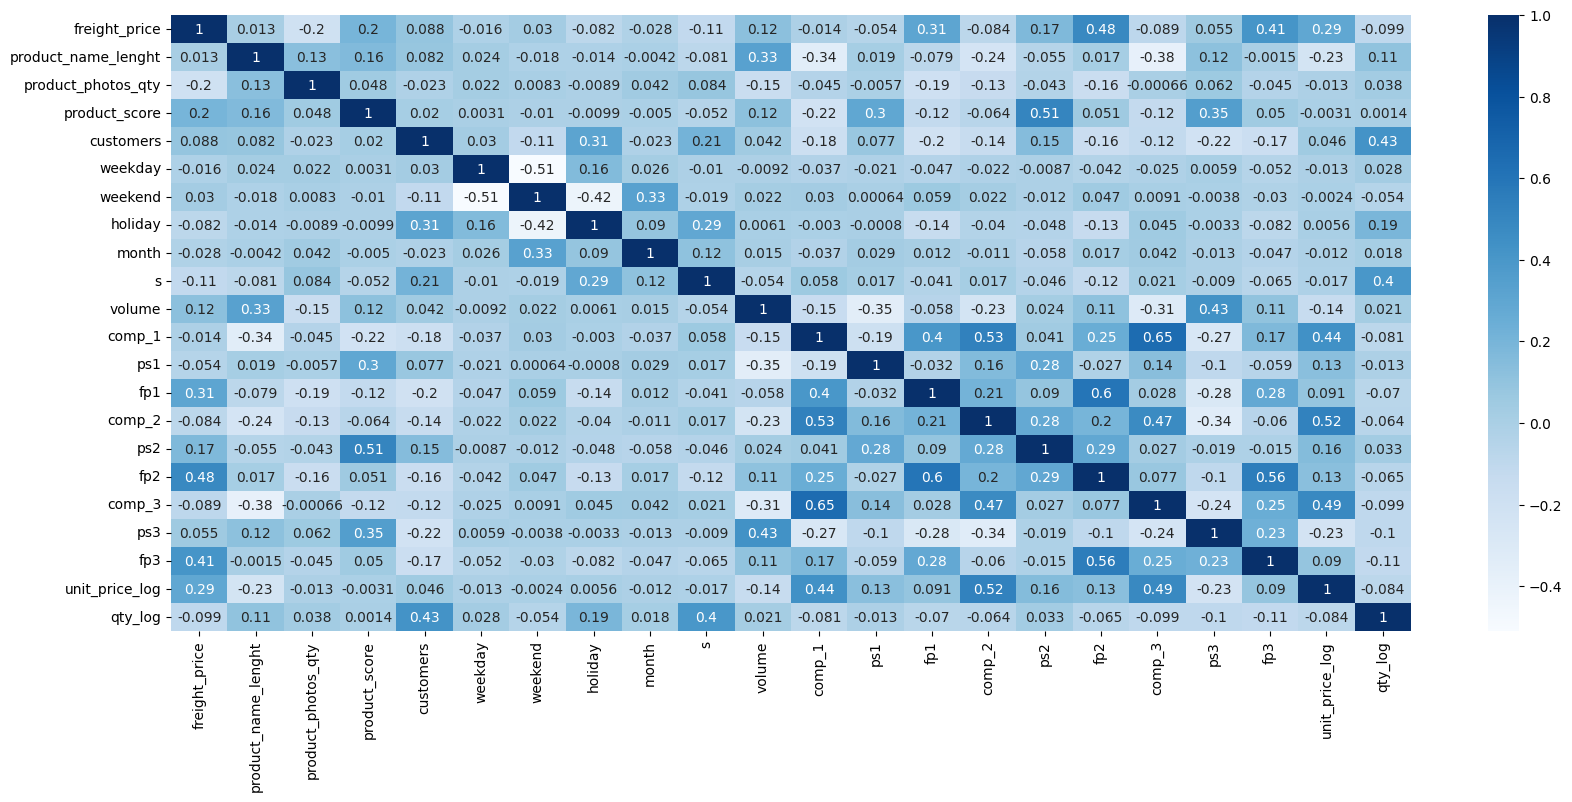

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(df_copy.corr(),annot=True,cmap="Blues")

In [ ]:
df_copy.isnull().sum()

freight_price          0
product_name_lenght    0
product_photos_qty     0
product_score          0
customers              0
weekday                0
weekend                0
holiday                0
month                  0
s                      0
volume                 0
comp_1                 0
ps1                    0
fp1                    0
comp_2                 0
ps2                    0
fp2                    0
comp_3                 0
ps3                    0
fp3                    0
unit_price_log         0
qty_log                0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x,y=df_copy.drop(['unit_price_log'],axis=1),df_copy['unit_price_log']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(507, 21) (169, 21) (507,) (169,)


Modelling


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_test,y_test)

0.5147731640273528

In [ ]:
y_pred_reg=reg.predict(x_test)
print(y_pred_reg)

[4.18959538 4.09614674 4.91257232 4.68713818 4.51391284 4.19367573
 4.51567676 4.4025288  4.38741381 4.67336041 4.83265289 4.06275444
 4.5346735  4.62637537 4.25210897 4.85426616 4.10491498 4.56518544
 4.10356871 3.93794972 4.32990383 3.70533364 5.53622948 3.91396099
 4.13150121 4.05022074 3.9675824  4.11538813 3.69348623 3.80752312
 4.23251134 4.45568395 3.94312796 4.38849149 5.02969929 4.65120203
 4.37659645 5.00830158 5.58233158 3.94233987 4.06527782 4.98923832
 3.89878013 4.59208195 4.13344003 4.92423323 4.04703041 4.48980402
 4.77358745 5.12549    4.2253357  3.61115908 5.05103129 4.37334855
 4.13739628 4.45634222 4.89728321 4.08861809 4.49833004 4.77326292
 4.20177179 4.47620337 4.06159394 4.99660115 4.1769366  4.60869488
 4.40577118 4.43263398 4.63313236 3.90751832 4.07033951 4.91965076
 4.162923   4.52805112 4.18246184 4.02235945 4.45287739 6.63589636
 4.69257697 4.48129658 5.21711445 5.62182617 3.73338726 3.69346942
 4.76411656 5.08054081 4.59960608 4.55946594 3.68997522 4.1179

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred_reg, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Retail Unit Price'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test,y_test)

0.9614558500260323

KNN


Mean Squared Error: 0.03
R-squared (R2) Score: 0.93


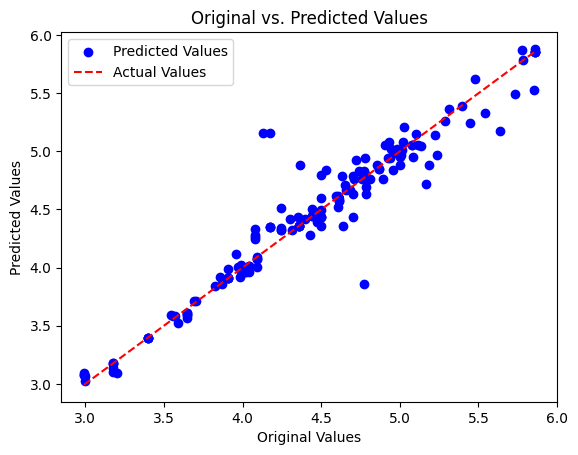

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the K-NN regressor on the training data
knn_regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = knn_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.scatter(y_test, y_pred, label='Predicted Values', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Original vs. Predicted Values")
plt.legend()
plt.show()
